### NAME : S.Sanjith
### ID NO : 190562G
### COURSE CODE : EN2550

In [1]:
#Importing libraries
import matplotlib.pyplot as plt 
import numpy as np
import cv2 as cv

im_dir = r'E:/Semester 4/EN2550_FundamentalsOfImageProcessing/Fun-Time/Exercises/images/'

Q1. Fit Houghlines to the Soduko image.

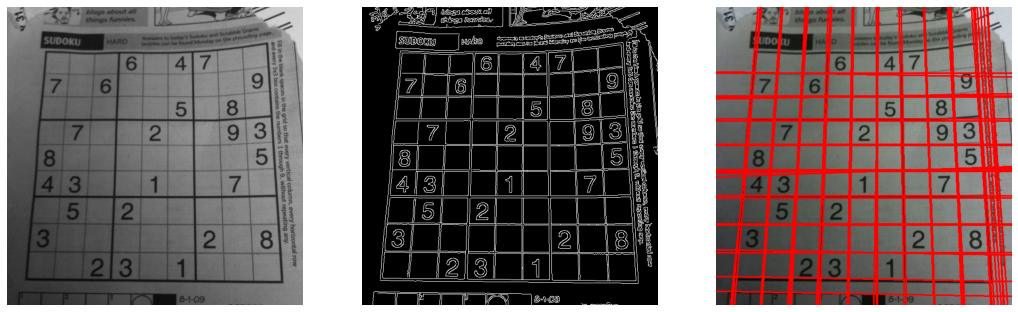

In [2]:
f1 = cv.imread(im_dir+'sudoku.png', cv.IMREAD_COLOR)
assert f1 is not None

f1_gray = cv.cvtColor(f1, cv.COLOR_BGR2GRAY)
f1_edges = cv.Canny(f1_gray, 20, 120, apertureSize=3)
lines = cv.HoughLines(f1_edges, 1, np.pi/180, 175)

for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0, y0 = a*rho, b*rho
    x1, y1 = int(x0+1000*(-b)), int(y0 + 1000*a)
    x2, y2 = int(x0-1000*(-b)), int(y0 - 1000*a)
    cv.line(f1, (x1, y1), (x2, y2), (0, 0, 255), 2)

fig, ax=plt.subplots(1,3,figsize=(18,6))

ax[0].imshow(f1_gray,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(f1_edges ,cmap='gray',vmin=0,vmax=255)
ax[2].imshow(cv.cvtColor(f1, cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")
plt.show()

Q2. Fit Hough circles to the coins image.

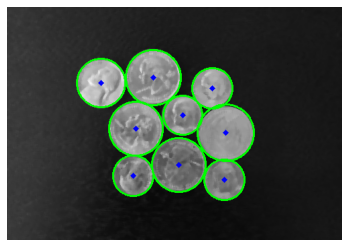

In [3]:
f2 = cv.imread(im_dir+'coins.jpg', cv.IMREAD_COLOR)
assert f2 is not None

f2_gray = cv.cvtColor(f2, cv.COLOR_BGR2GRAY)
f2_gray = cv.medianBlur(f2_gray,5)
cimg = cv.cvtColor(f2_gray,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(f2_gray,cv.HOUGH_GRADIENT,1,50, param1=150,param2=20, minRadius=20,maxRadius=50)
circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig, ax =plt.subplots(figsize=(6,6)) 
ax.imshow(cimg,cmap='gray',vmin=0,vmax=255)
plt.axis("off")
plt.show()

Q3. Use generalized Hough transform to match the template with the image.

x = 29.0, y=109.0, scale = 1.0, orientation = 0.0, p1 =(4, 76) , p2=(54, 141)


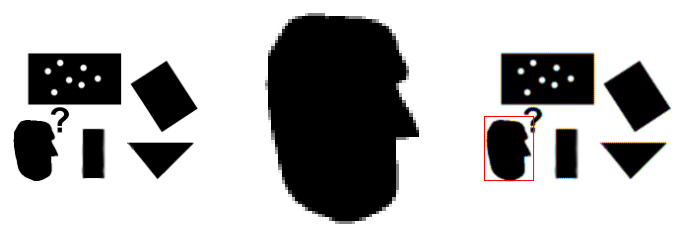

In [4]:
f3 = cv.imread(im_dir+'pic1.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
temp = cv.imread(im_dir+'templ.png', cv.IMREAD_REDUCED_GRAYSCALE_2)
assert f3 is not None
assert temp is not None

# Canny edge detection
f3_edges = cv.Canny(f3, 50, 150)
temp_edges = cv.Canny(temp, 50, 250)

alg = cv.createGeneralizedHoughGuil()
alg.setTemplate(temp_edges)

# Votes thresholds (to be carefully selected)
alg.setAngleThresh(100000)
alg.setScaleThresh(40000)
alg.setPosThresh(1000)

alg.setAngleStep(1)
alg.setScaleStep(0.1)
alg.setMinScale(0.9)
alg.setMaxScale(1.1)

positions, votes = alg.detect(f3_edges)

out = cv.cvtColor(f3, cv.COLOR_BAYER_BG2BGR)
for x, y, scale, orientation, in positions[0]:
    halfHeight = temp.shape[0] / 2. * scale
    halfWidth = temp.shape[1]/2. * scale
    p1 = (int(x-halfWidth), int(y-halfHeight))
    p2 = (int(x+halfWidth), int(y+halfHeight))
    print("x = {}, y={}, scale = {}, orientation = {}, p1 ={} , p2={}".format(x, y, scale, orientation, p1, p2))
    cv.rectangle(out, p1,p2, (0,0,255))


fig, ax=plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(f3,cmap='gray',vmin=0,vmax=255)
ax[1].imshow(temp ,cmap='gray',vmin=0,vmax=255)
ax[2].imshow(cv.cvtColor(out, cv.COLOR_BGR2RGB))
for i in range(3):
    ax[i].axis("off")
plt.show()

Q4. Using he given code (item no. 1), experiment with various types of 2-D transformations.

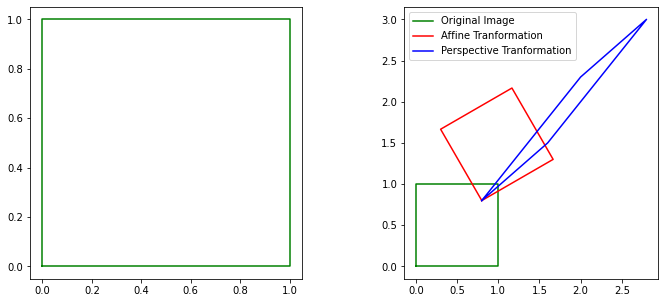

In [5]:
a, b, c, d = [0, 0, 1], [0, 1, 1], [1, 1, 1], [1, 0, 1]
X = np.array([a, b, c, d]).T

theta = np.pi*30/180
s = 1
tx, ty = 0.8, 0.8
H = np.array([[s*np.cos(theta), -s*np.sin(theta), tx],
             [s*np.sin(theta), s*np.cos(theta), ty], [0, 0, 1]])
Y1 = H @ X

# Affine Transformation
a11, a12, a21, a22 = 0.8, 1.2, 0.7, 1.5
A = np.array([[a11, a12, tx], [a21, a22, ty], [0, 0, 1]])
Y2 = A @ X

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

x0 = np.append(X[0, :], X[0, 0])
y0 = np.append(X[1, :], X[1, 0])
ax[0].plot(x0, y0, color='g')

x1 = np.append(Y1[0, :], Y1[0, 0])
y1 = np.append(Y1[1, :], Y1[1, 0])
x2 = np.append(Y2[0, :], Y2[0, 0])
y2 = np.append(Y2[1, :], Y2[1, 0])


ax[1].plot(x0, y0, color='g', label="Original Image")
ax[1].plot(x1, y1, color='r',label="Affine Tranformation")
ax[1].plot(x2, y2, color='b',label="Perspective Tranformation")
ax[1].legend(loc='best')
for i in range(2):
    ax[i].set_aspect('equal')
